# Install package 

In [2]:
!pip install vnstock


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Prepair data

In [2]:
# "STB, VIC, SSI, MSN, FPT, HAG, KDC, EIB, DPM, VNM, REE, OGC, IJC, VCB, PNJ, BVH, ITA, HPG, CTG, SJS, QCG, PVF, PVD, CII, SBT, VSH, KDH, DIG, HVG, GMD".split(", ")

In [3]:
from vnstock import *
import pandas as pd
import numpy as np

# Tạo danh sách các mã cổ phiếu
tickers = ['VIC', 'DCM', 'DPM', 'TCB', 'QTP']
# Tải dữ liệu giá cổ phiếu từ Yahoo Finance
data = pd.DataFrame()
for ticker in tickers:
  try:
    df =  stock_historical_data(symbol=ticker, 
                                start_date="2023-10-13", 
                                end_date='2023-10-18') [['time', 'close']]
    df.rename(columns={'close': ticker}, inplace=True)
    df.set_index('time', inplace=True)
    data = pd.concat([data, df], axis=1)
    print(data)
  except Exception as e:
    print(e)
    print(ticker)

              VIC
time             
2023-10-13  46100
2023-10-16  45000
2023-10-17  44000
2023-10-18  43800
              VIC    DCM
time                    
2023-10-13  46100  36750
2023-10-16  45000  37050
2023-10-17  44000  34500
2023-10-18  43800  33200
              VIC    DCM    DPM
time                           
2023-10-13  46100  36750  39600
2023-10-16  45000  37050  40300
2023-10-17  44000  34500  38200
2023-10-18  43800  33200  36000
              VIC    DCM    DPM    TCB
time                                  
2023-10-13  46100  36750  39600  32200
2023-10-16  45000  37050  40300  31800
2023-10-17  44000  34500  38200  31750
2023-10-18  43800  33200  36000  31250
              VIC    DCM    DPM    TCB      QTP
time                                           
2023-10-13  46100  36750  39600  32200      NaN
2023-10-16  45000  37050  40300  31800  15300.0
2023-10-17  44000  34500  38200  31750  15400.0
2023-10-18  43800  33200  36000  31250  15300.0


In [102]:
# save data
data.to_csv('stock_data.csv')

In [132]:
data

,VIC,DCM,DPM,TCB,QTP
time,,,,,
2023-10-13,46100,36750,39600,32200,NaN
2023-10-16,45000,37050,40300,31800,15300.0
2023-10-17,44000,34500,38200,31750,15400.0


# Optimal inventory theory


cov(X, Y) = Σ [(Xi - X̄) * (Yi - Ȳ)] / (n - 1)
Trong đó:

X, Y là các giá trị của biến X và Y.
X̄ (x-bar) và Ȳ (y-bar) là giá trị trung bình của biến X và Y, tương ứng.
Xi và Yi là các giá trị của biến X và Y trong các quan sát cụ thể.
n là số lượng quan sát (mẫu) trong tập dữ liệu.
########################################################################################################

cov(X, Y) là giá trị của covariance giữa hai biến X và Y. Nó đo độ biến đổi cùng chiều hoặc nghịch chiều giữa X và Y. Giá trị cov(X, Y) có thể là dương, âm hoặc gần bằng 0:

cov(X, Y) > 0: Điều này cho biết X và Y thường tăng hoặc giảm cùng nhau. Khi X tăng, Y thường cũng tăng, và ngược lại.

cov(X, Y) < 0: Điều này cho biết X và Y thường có xu hướng tăng và giảm ngược nhau. Khi X tăng, Y thường giảm, và ngược lại.

cov(X, Y) ≈ 0: Điều này cho biết không có sự tương quan đáng kể giữa X và Y.

Covariance thường được sử dụng để đánh giá mối quan hệ giữa các biến trong thống kê và phân tích dữ liệu. Tuy nhiên, nó có thể bị ảnh hưởng bởi thang đo của dữ liệu, và do đó, không phải lúc nào cũng thể hiện một mối quan hệ mạnh mẽ giữa các biến.

In [4]:
# Tính lợi nhuận kỳ vọng và độ lệch chuẩn của các tài sản
returns = data.pct_change()
# returns.to_csv("returns.csv")
# print(returns)

# print(type(returns))
# returns = returns.reset_index(drop=True)
# print(type(returns))
# print(returns)

mean_returns = returns.mean()
print(mean_returns)

cov_matrix = returns.cov()
print(cov_matrix)

VIC   -0.016876
DCM   -0.032781
DPM   -0.030675
TCB   -0.009914
QTP    0.000021
dtype: float64
          VIC       DCM       DPM       TCB       QTP
VIC  0.000115 -0.000077 -0.000278 -0.000050 -0.000115
DCM -0.000077  0.001500  0.001442 -0.000187 -0.000203
DPM -0.000278  0.001442  0.001761 -0.000072  0.000036
TCB -0.000050 -0.000187 -0.000072  0.000055  0.000092
QTP -0.000115 -0.000203  0.000036  0.000092  0.000085


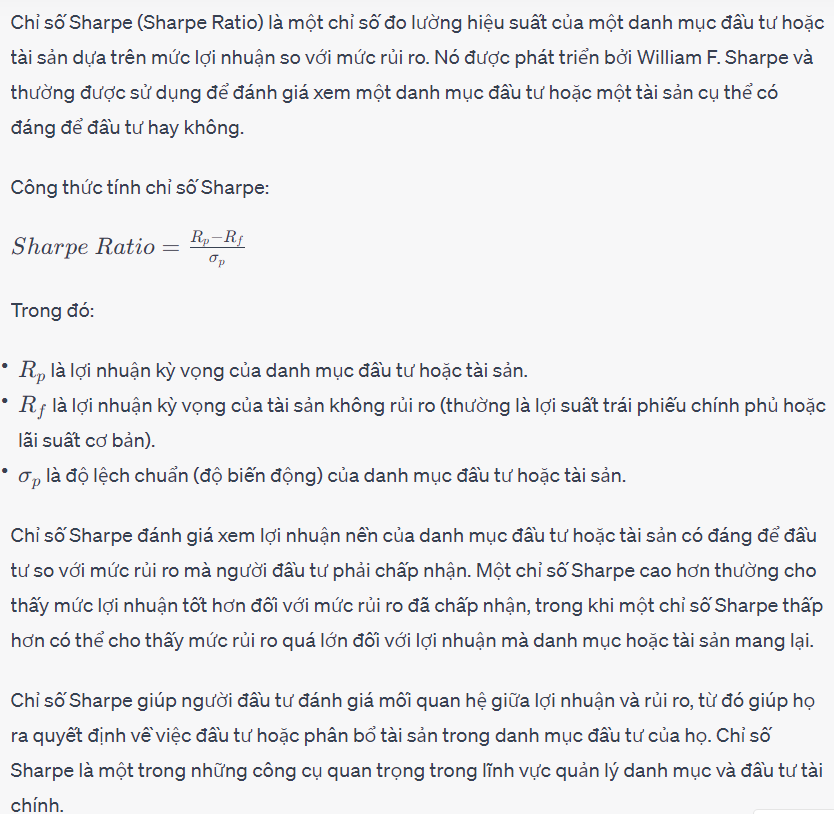

In [110]:
def portfolio_optimization(mean_returns, cov_matrix):
    num_assets = len(tickers)
    num_portfolios = 10000

    # Tạo danh sách chứa tất cả các trọng số của danh mục đầu tư
    weights_list = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_list.append(weights)

    # Tính toán lợi nhuận và độ lệch chuẩn của từng danh mục đầu tư
    portfolio_returns = []
    portfolio_volatilities = []
    for weights in weights_list:
        portfolio_returns.append(np.sum(mean_returns * weights))
        portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))))
    portfolio_returns = np.array(portfolio_returns)
    portfolio_volatilities = np.array(portfolio_volatilities)

    # Tìm danh mục đầu tư tối ưu
    portfolio_sharpe_ratios = portfolio_returns / portfolio_volatilities
    max_sharpe_ratio_index = np.argmax(portfolio_sharpe_ratios)
    optimal_weights = weights_list[max_sharpe_ratio_index]

    return portfolio_returns, portfolio_volatilities, portfolio_sharpe_ratios, optimal_weights

# Tính toán đầu tư tối ưu
portfolio_returns, portfolio_volatilities, portfolio_sharpe_ratios, optimal_weights = portfolio_optimization(mean_returns, cov_matrix)

# In kết quả
print("Lợi nhuận kỳ vọng của danh mục đầu tư tối ưu: ", np.round(np.sum(mean_returns * optimal_weights) * 100, 2), "%")
print("Độ lệch chuẩn của danh mục đầu tư tối ưu: ", np.round(np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))) * 100, 2), "%")
print("Tỷ lệ phân bổ tài sản trong danh mục đầu tư tối ưu: ")
for i in range(len(tickers)):
    print(tickers[i] + ": ", np.round(optimal_weights[i] * 100, 2), "%")

Lợi nhuận kỳ vọng của danh mục đầu tư tối ưu:  -1.6 %
Độ lệch chuẩn của danh mục đầu tư tối ưu:  nan %
Tỷ lệ phân bổ tài sản trong danh mục đầu tư tối ưu: 
VIC:  28.01 %
DCM:  14.12 %
DPM:  25.55 %
TCB:  21.82 %
QTP:  10.5 %


# Pair trading

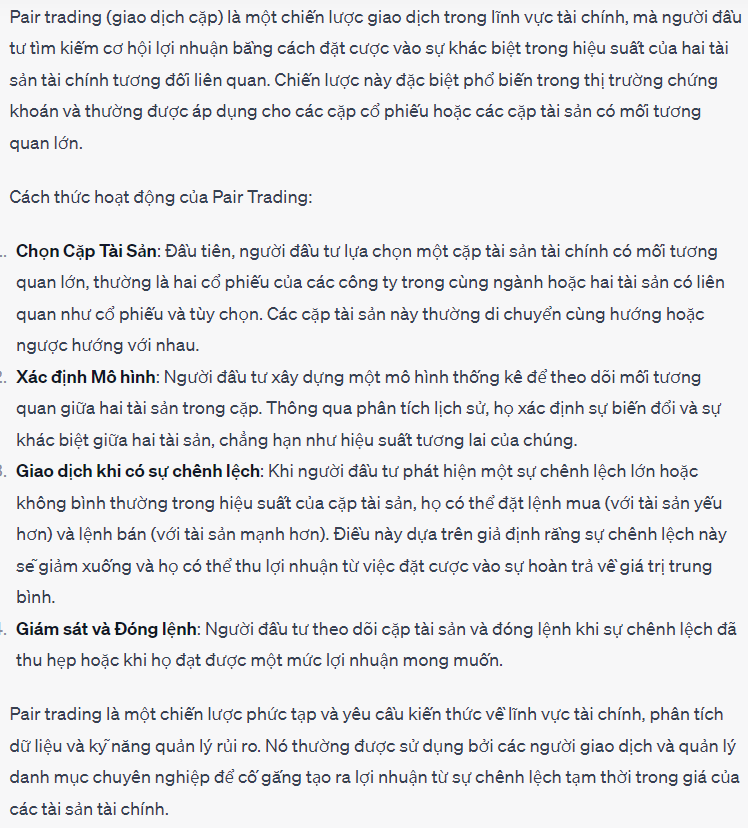

In [133]:
import matplotlib.pyplot as plt

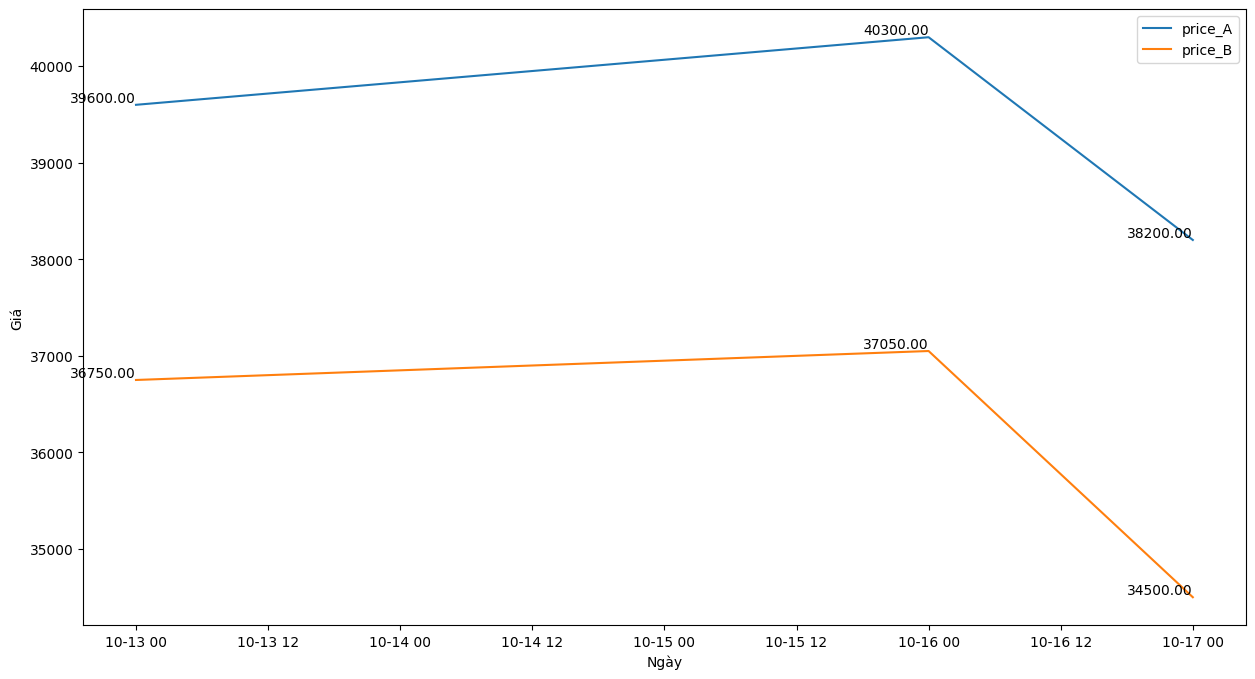

In [135]:
# df = pd.DataFrame()
# df['price_A'] = data['DPM']
# df['price_B'] = data['DCM']
# df['date'] = data.index
# print(df)
# plt.plot(df['price_A'])
# plt.plot(df['price_B'])
# plt.legend(['price_A', 'price_B'])
# import pandas as pd
# import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
# Tạo DataFrame df
df = pd.DataFrame()
df['price_A'] = data['DPM']
df['price_B'] = data['DCM']
df['date'] = data.index
# Tạo một hình ảnh mới
plt.figure(figsize=(15, 8))  # Điều chỉnh kích thước theo ý muốn
# Vẽ biểu đồ giá
plt.plot(df['date'], df['price_A'], label='price_A')
plt.plot(df['date'], df['price_B'], label='price_B')
# Hiển thị nhãn cho cột
plt.xlabel('Ngày')
plt.ylabel('Giá')
# Hiển thị giá trị lên trên điểm đầu của mỗi cột
for i in range(len(df)):
    plt.text(df['date'].iloc[i], df['price_A'].iloc[i], f'{df["price_A"].iloc[i]:.2f}', ha='right', va='bottom')
    plt.text(df['date'].iloc[i], df['price_B'].iloc[i], f'{df["price_B"].iloc[i]:.2f}', ha='right', va='bottom')
# Hiển thị chú thích
plt.legend()
# Hiển thị biểu đồ
plt.show()

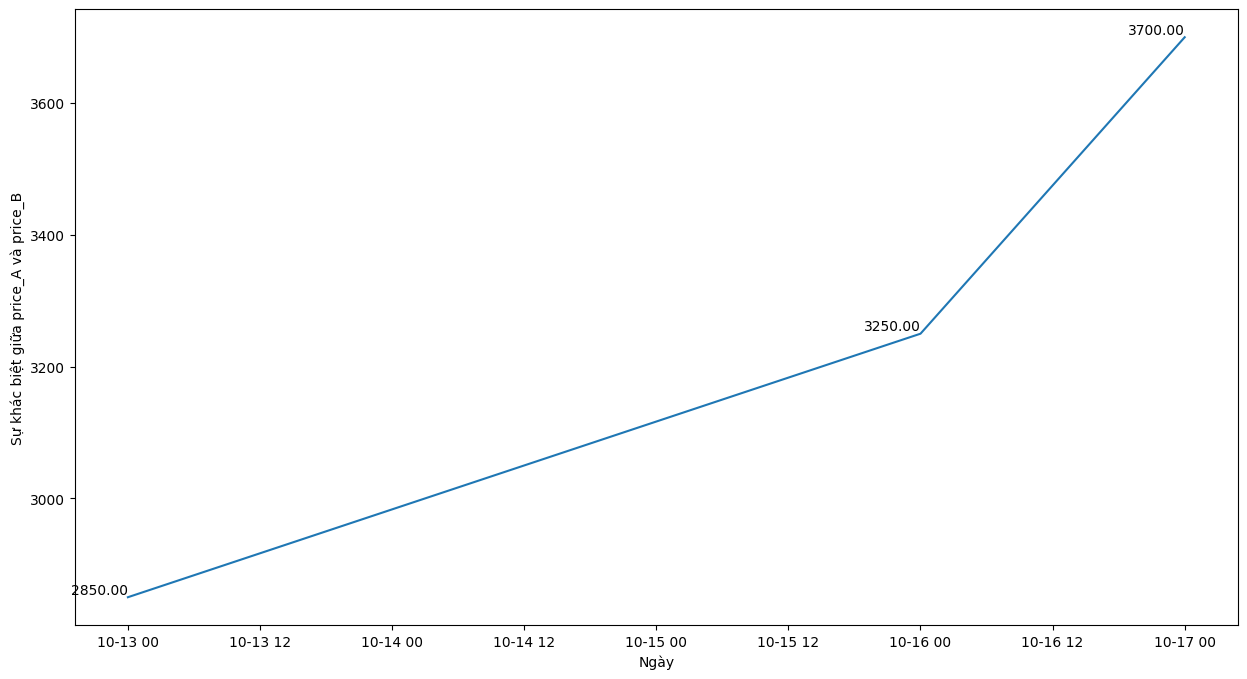

In [137]:
# plt.plot(df['price_A']-df['price_B'])

import pandas as pd
import matplotlib.pyplot as plt
# Tạo DataFrame df
df = pd.DataFrame()
df['price_A'] = data['DPM']
df['price_B'] = data['DCM']
df['date'] = data.index
# Tạo một hình ảnh mới
plt.figure(figsize=(15, 8))  # Điều chỉnh kích thước theo ý muốn
# Tính sự khác biệt giữa price_A và price_B
df['price_difference'] = df['price_A'] - df['price_B']
# Vẽ biểu đồ sự khác biệt
plt.plot(df['date'], df['price_difference'])
# Hiển thị nhãn cho cột
plt.xlabel('Ngày')
plt.ylabel('Sự khác biệt giữa price_A và price_B')
# Hiển thị giá trị sự khác biệt lên trên điểm đầu của mỗi cột
for i in range(len(df)):
    plt.text(df['date'].iloc[i], df['price_difference'].iloc[i], f'{df["price_difference"].iloc[i]:.2f}', ha='right', va='bottom')
# Hiển thị biểu đồ
plt.show()

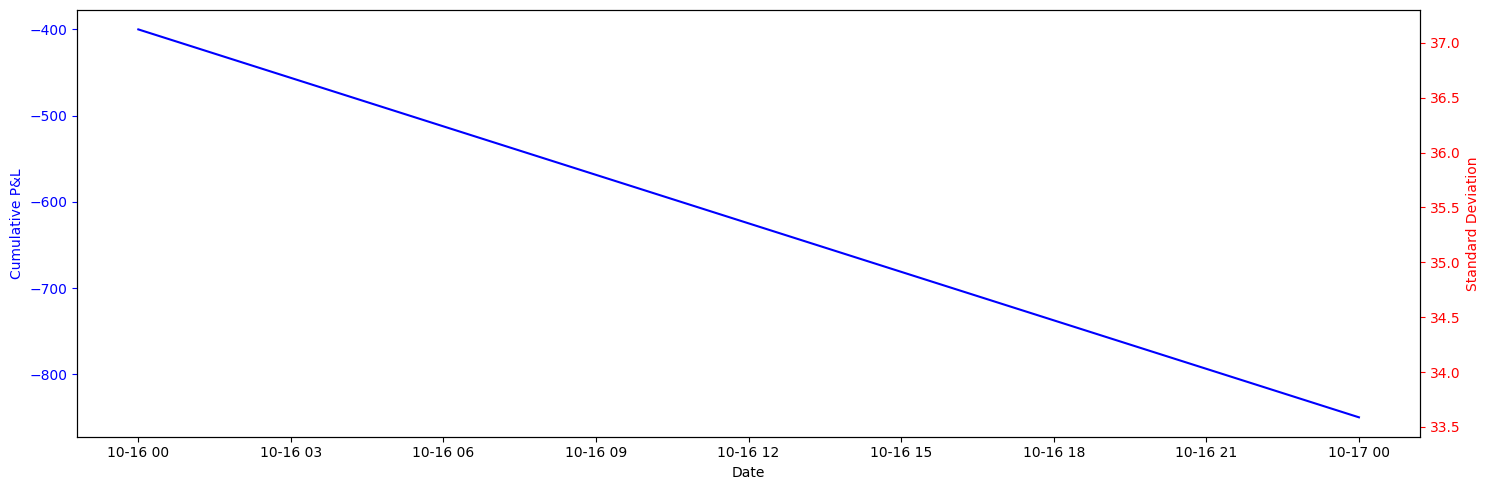

In [138]:
# Tính toán sự khác biệt giá của hai tài sản
df['diff'] = df['price_A'] - df['price_B']
df['A_return'] = df['price_A'].diff()
df['B_return'] = df['price_B'].diff()
df['returns'] = df['A_return'] - df['B_return']

# Xác định điểm vào lệnh khi sự khác biệt giá vượt qua ngưỡng xác định
threshold = 2 * df['diff'].std()
df['signal'] = (df['diff'] < -threshold).astype(int) - (df['diff'] > threshold).astype(int)

# Tính toán lợi nhuận và độ lệch chuẩn
df['pnl'] = df['signal'].shift(1) * df['returns']
df['cum_pnl'] = df['pnl'].cumsum()
df['std'] = df['pnl'].expanding().std()

# Vẽ biểu đồ lợi nhuận tích lũy và độ lệch chuẩn
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(df['date'], df['cum_pnl'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative P&L', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df['date'], df['std'], 'r-')
ax2.set_ylabel('Standard Deviation', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()
